In [1]:
#import libs
import sys,os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
os.chdir(r'G:\My Drive\Documents\PhD\Modelling\_RiceBall')
from ricepaper.reader import RiceBall

In [3]:
try:
    reload(pp)
except:
    import ricepaper.postprocess as pp

In [4]:
#load a model
model = RiceBall('OUT6.OUT',radii={1 : 30, 2 : 25, 3 : 20})

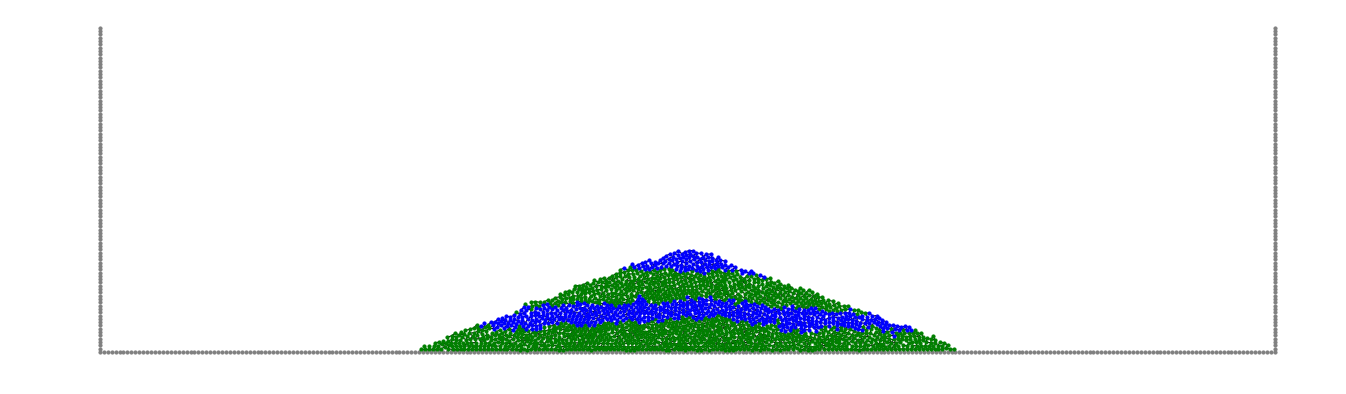

In [5]:
model.quickPlot()

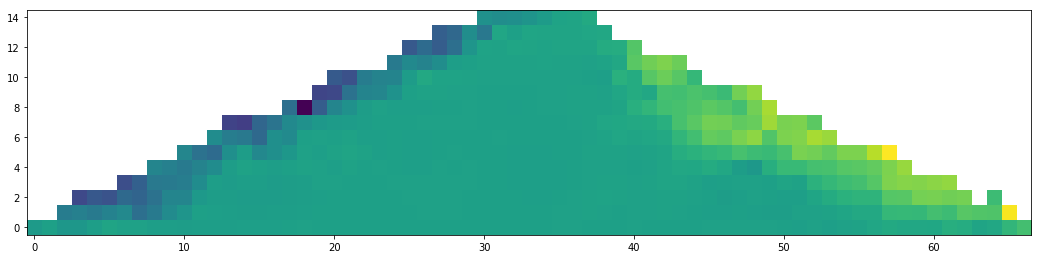

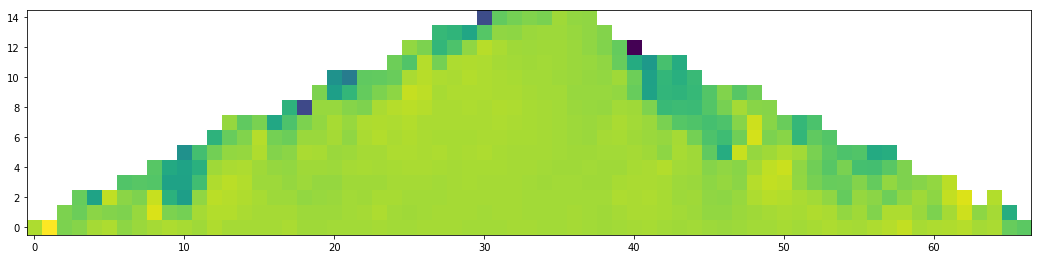

In [6]:
#test some simple grids
vx = pp.gridModel( model, "UDOT.x",100)
vy = pp.gridModel( model, "UDOT.y",100)

pp.quickPlot( vx ) #grid particle x-velocity
pp.quickPlot( vy ) #grid particle y-velocity

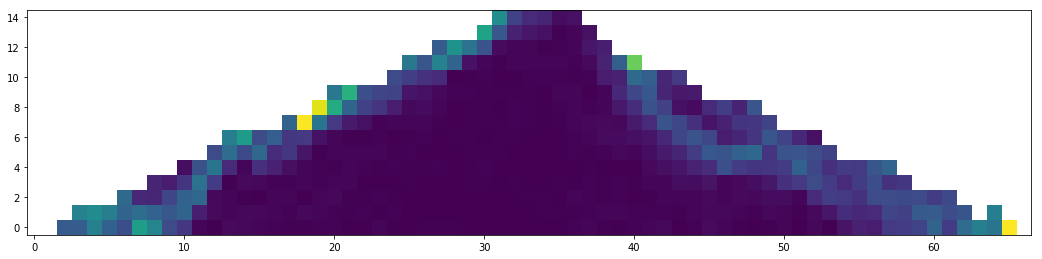

In [7]:
#combine to vector field
V = np.dstack([vx,vy])

#calculate magnitude of the vector field (i.e. the particle "speed")
V_norm = np.linalg.norm(V,axis=2)

#calculate gradient of this scalar field
grad = np.dstack(np.gradient(V_norm,100)) #var-args is spacing between samples
grad = np.linalg.norm(grad,axis=2)
pp.quickPlot(grad)

In [8]:
#calculate per-particle stresses
stress = model.computeParticleStresses()

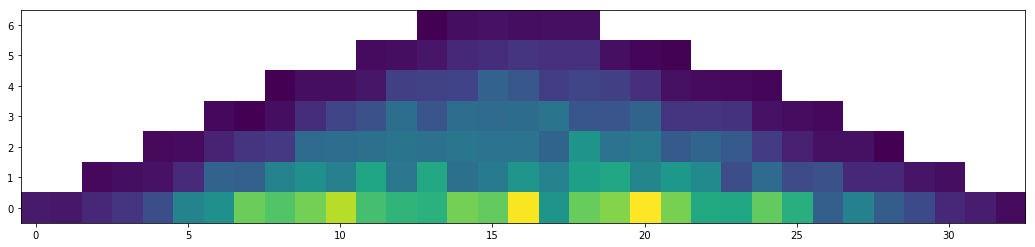

In [9]:
#grid differential stress
dif = pp.gridModel( model, "dif",200)
pp.quickPlot(dif)

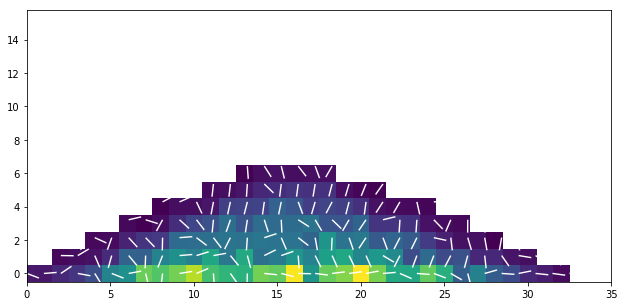

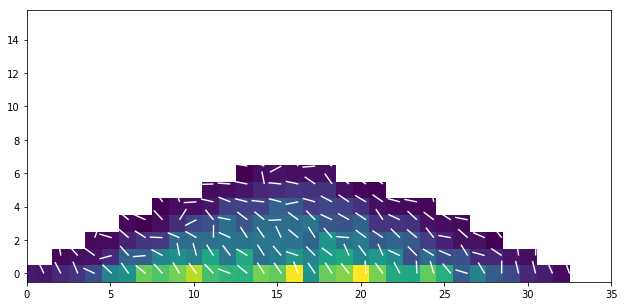

In [21]:
#plot sigma 1 and sigma 3 on diff stress
sig1 = pp.gridModel( model, "sigma1",100)
sig3 = pp.gridModel( model, "sigma3",100)

pp.quickPlot(dif,hold=True)
pp.quickPlotV(sig1,cmap=None,scale=30,headwidth=0,color="white",hold=True)
plt.xlim(0,35)
pp.quickPlot(dif,hold=True)
plt.xlim(0,35)
pp.quickPlotV(sig3,cmap=None,scale=30,headwidth=0,color="white",hold=True)